# 1. Chargement et exploration initiale des données
• Importer les bibliothèques nécessaires (pandas, numpy, matplotlib, seaborn, 
sklearn) <br>
• Charger le dataset <br>
• Afficher les premières lignes et les informations de base (types de données, 
statistiques descriptives

In [31]:
#Projet Python pour data sciences 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb, sklearn as sk
df=pd.read_csv("Engineering_graduate_salary.csv")

df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


# 2. Nettoyage et préparation des données
• Identifier et gérer les valeurs manquantes <br>
• Utiliser des techniques comme l'imputation par la moyenne/médiane ou 
des méthodes plus avancées <br>
• Détecter et traiter les valeurs aberrantes<br>
• Utiliser la méthode IQR (IQR = Q3 - Q1) ou z-score pour identifier les 
outliers<br>
• Décider de les supprimer ou de les transformer selon le contexte


In [34]:
nombre_de_lignes = df.shape[0]
print("Nombre de lignes :", nombre_de_lignes)

# Identification des valeurs manquantes
valeurs_vides = df.isnull().sum()

# On ne veut afficher que les colonnes ayant des valeurs manquantes 
colonnes_vides = valeurs_vides[valeurs_vides != 0]
print("Colonnes vides : ")
print(colonnes_vides)

Nombre de lignes : 2998
Colonnes vides : 
Series([], dtype: int64)


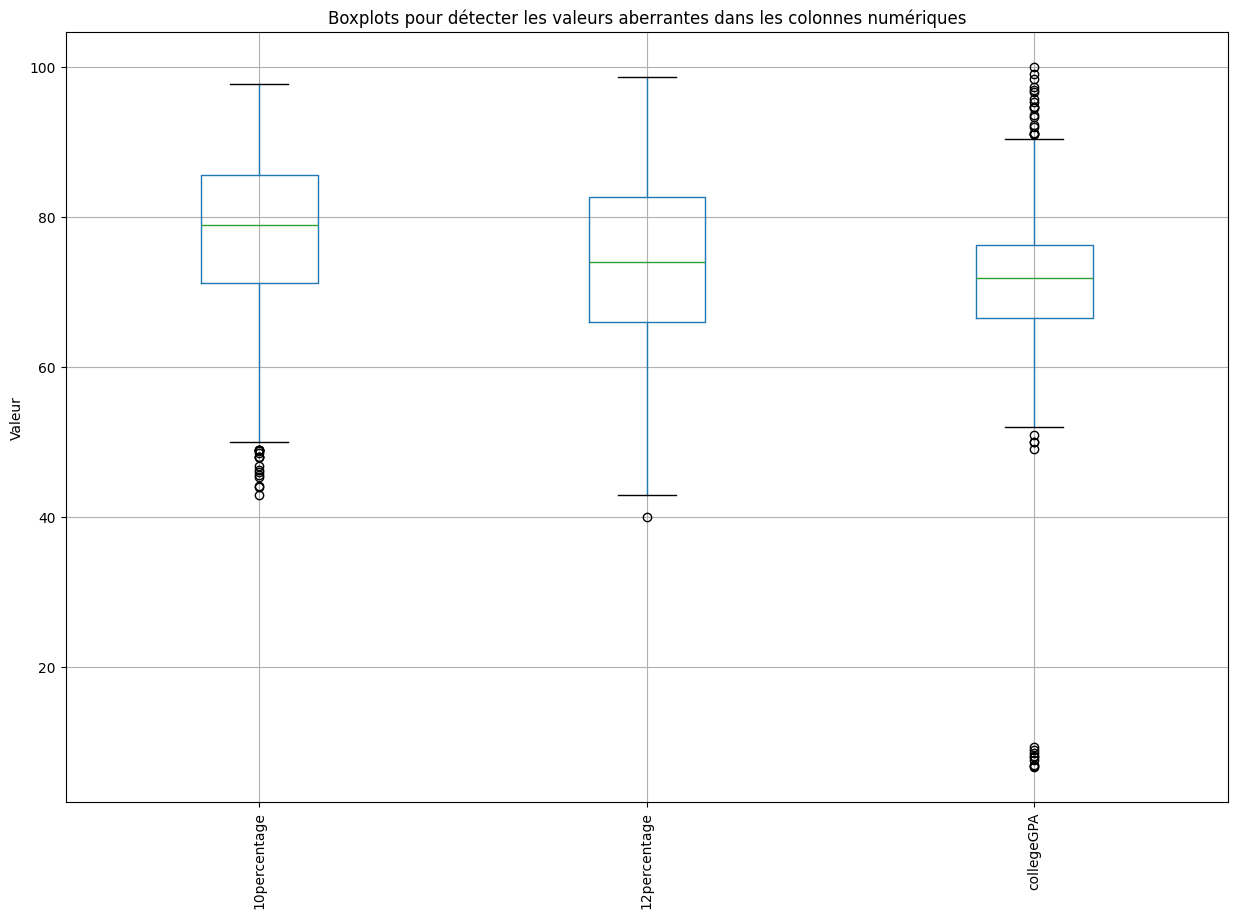

In [44]:

# Liste des colonnes numériques pour détecter les valeurs aberrantes
colonnes_numeriques = [
    '10percentage', '12percentage', 'collegeGPA'
]

# Créer des boxplots pour chaque colonne
plt.figure(figsize=(15, 10))
df[colonnes_numeriques].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots pour détecter les valeurs aberrantes dans les colonnes numériques")
plt.ylabel("Valeur")
plt.show()


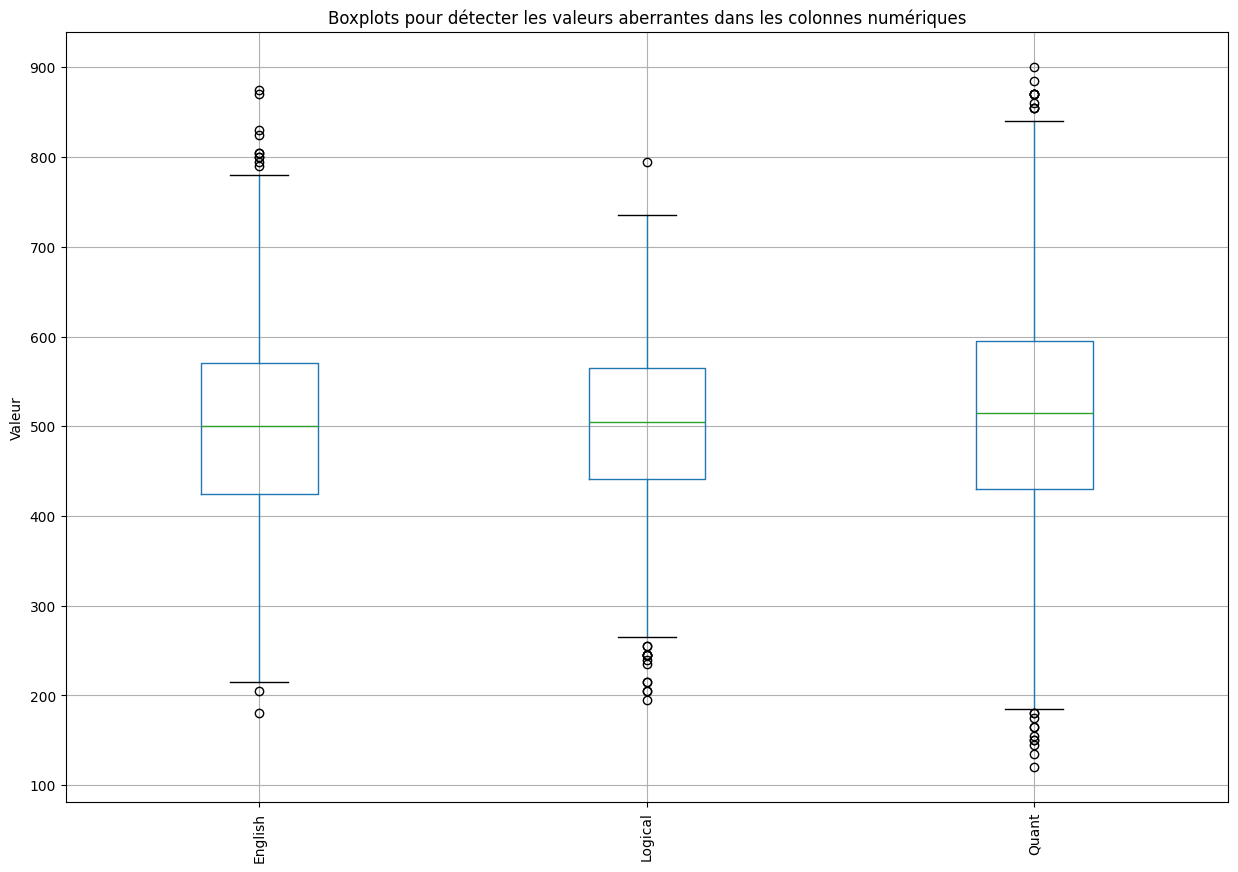

In [45]:

# Liste des colonnes numériques pour détecter les valeurs aberrantes
colonnes_numeriques = [
    'English', 'Logical', 'Quant'
]

# Créer des boxplots pour chaque colonne
plt.figure(figsize=(15, 10))
df[colonnes_numeriques].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots pour détecter les valeurs aberrantes dans les colonnes numériques")
plt.ylabel("Valeur")
plt.show()


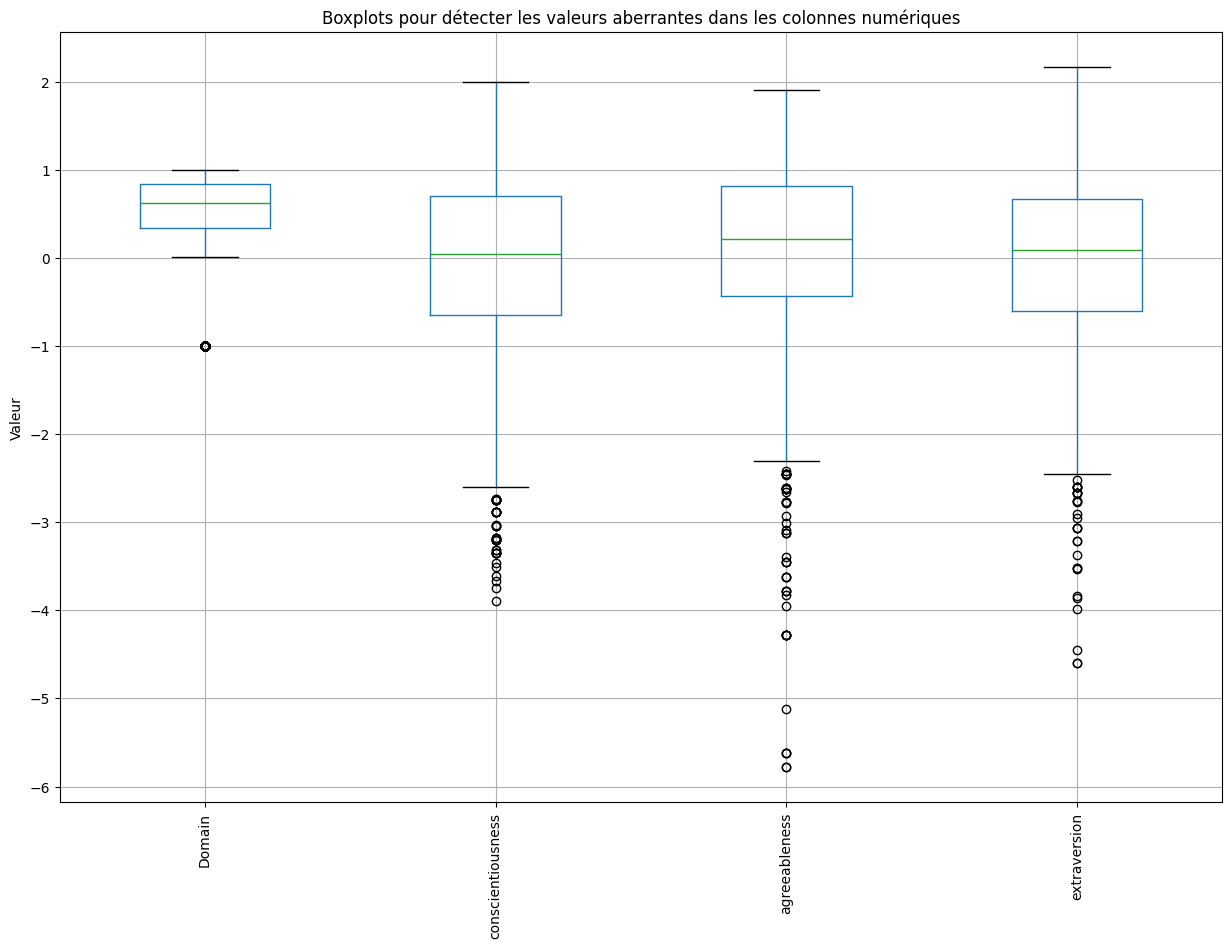

In [46]:
# Liste des colonnes numériques pour détecter les valeurs aberrantes
colonnes_numeriques = [
    'Domain', 'conscientiousness', 'agreeableness', 'extraversion'
]

# Créer des boxplots pour chaque colonne
plt.figure(figsize=(15, 10))
df[colonnes_numeriques].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots pour détecter les valeurs aberrantes dans les colonnes numériques")
plt.ylabel("Valeur")
plt.show()


# 3. Analyse exploratoire des données (EDA)
• Visualiser la distribution des variables (histogrammes, boxplots) <br>
• Analyser les corrélations entre les variables (heatmap de corrélation)<br>
• Créer des visualisations pertinentes pour comprendre les relations entre les 
variables et le statut diabétique

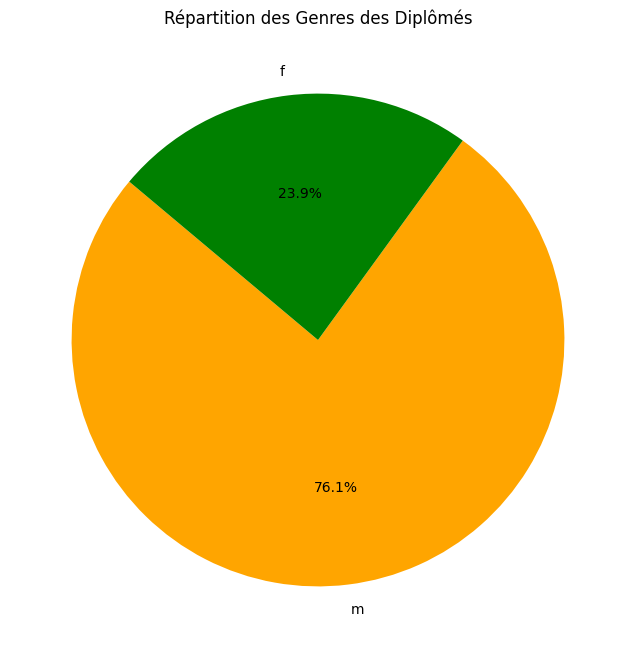

In [ ]:
import matplotlib.pyplot as plt

# Graphique en secteurs pour la répartition des genres #azerty
plt.figure(figsize=(8, 8))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'green'])
plt.title("Répartition des Genres des Diplômés")
plt.ylabel("")  # Enlever l'étiquette de l'axe y pour un meilleur affichage
plt.show()

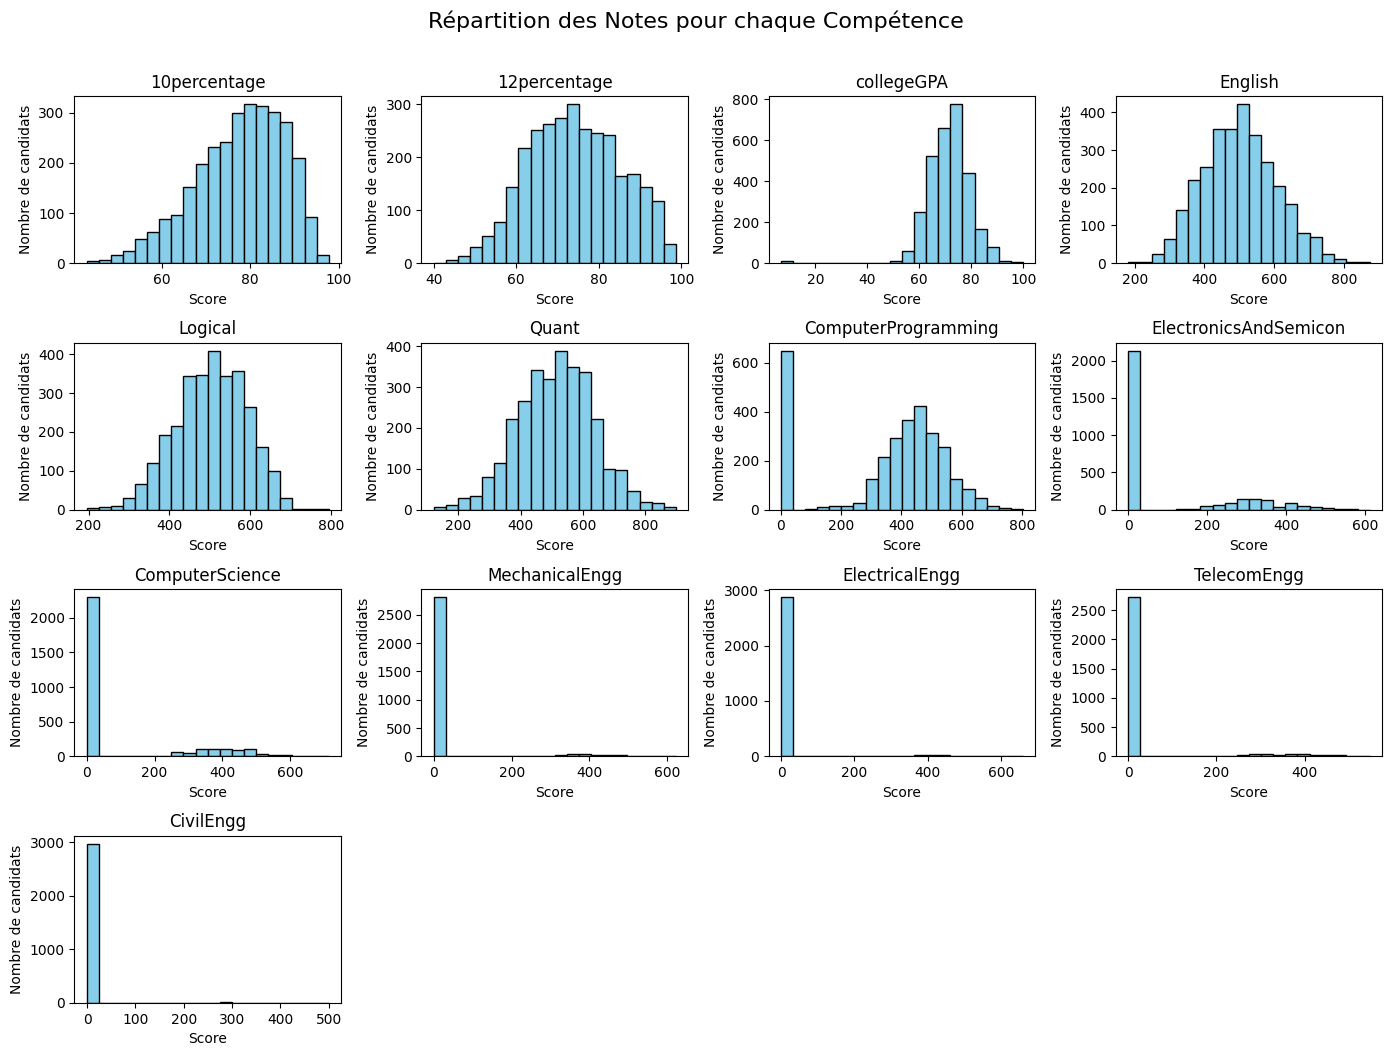

In [48]:
# Liste des colonnes contenant les notes ou scores des candidats
note_columns = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 
                'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Tracer la répartition des notes pour chaque colonne
plt.figure(figsize=(14, 10))
for i, col in enumerate(note_columns, 1):
    plt.subplot(4, 4, i)  # Subplots 4x4 (ajustement automatique selon le nombre de colonnes)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Score')
    plt.ylabel('Nombre de candidats')
    plt.tight_layout(pad=1.0)

plt.suptitle("Répartition des Notes pour chaque Compétence", y=1.05, fontsize=16)
plt.show()

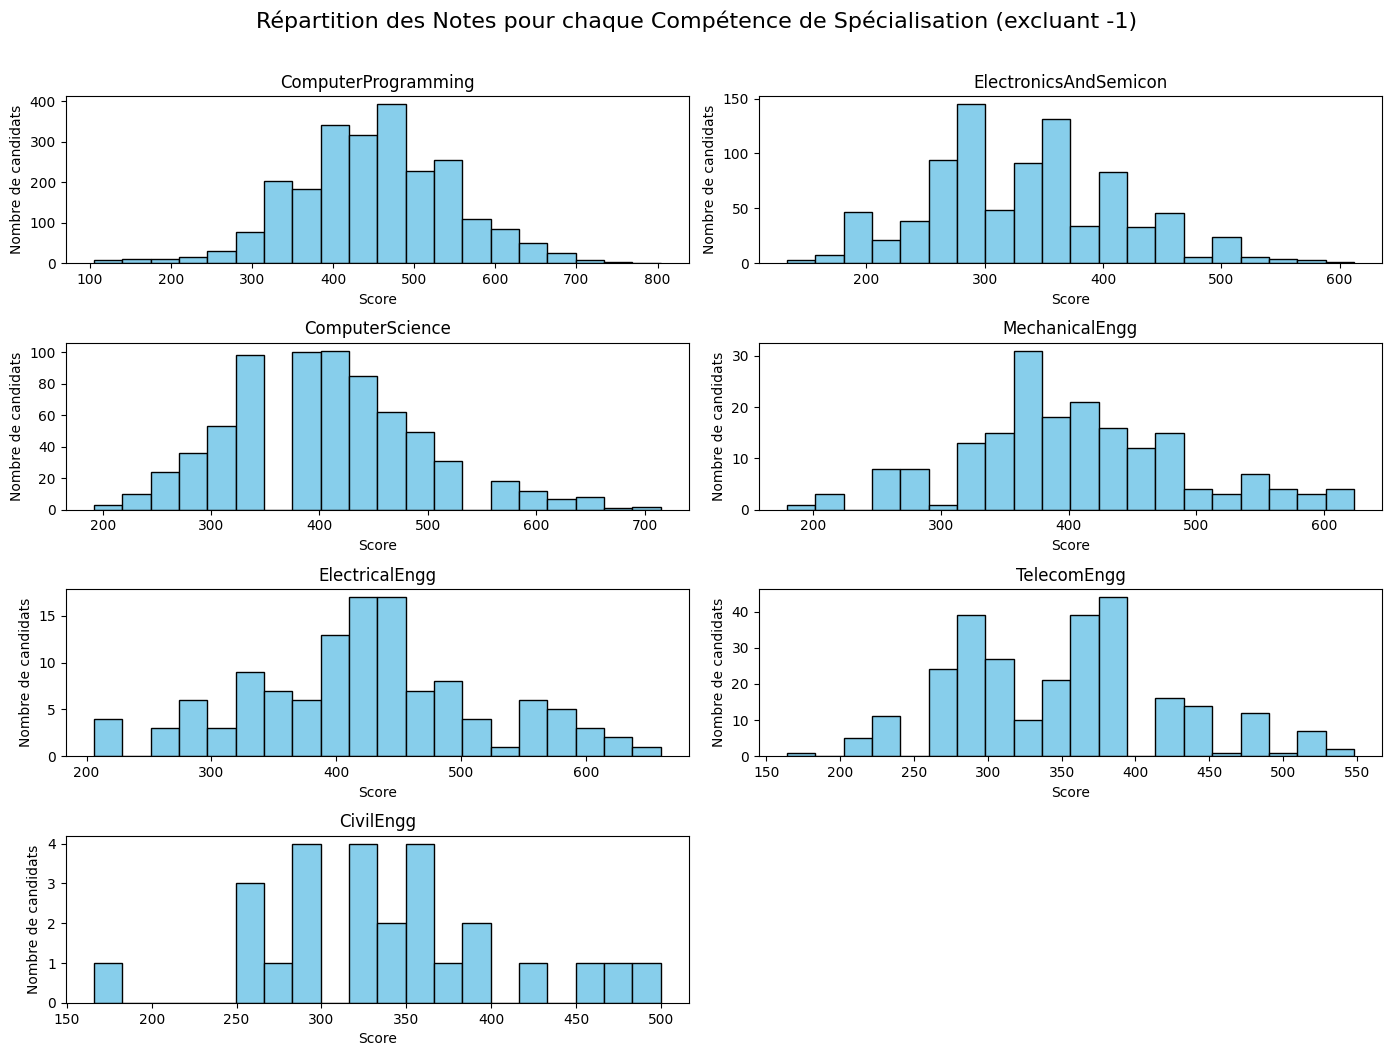

In [47]:
# Exclure les valeurs -1 pour les colonnes de spécialisation avant de tracer les histogrammes
note_columns_specialisation = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                               'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Tracer la répartition des notes pour chaque colonne de spécialisation, sans les -1
plt.figure(figsize=(14, 10))
for i, col in enumerate(note_columns_specialisation, 1):
    plt.subplot(4, 2, i)  # Subplots arrangés pour une meilleure visibilité
    plt.hist(df[col][df[col] != -1].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Score')
    plt.ylabel('Nombre de candidats')
    plt.tight_layout(pad=1.0)

plt.suptitle("Répartition des Notes pour chaque Compétence de Spécialisation (excluant -1)", y=1.05, fontsize=16)
plt.show()

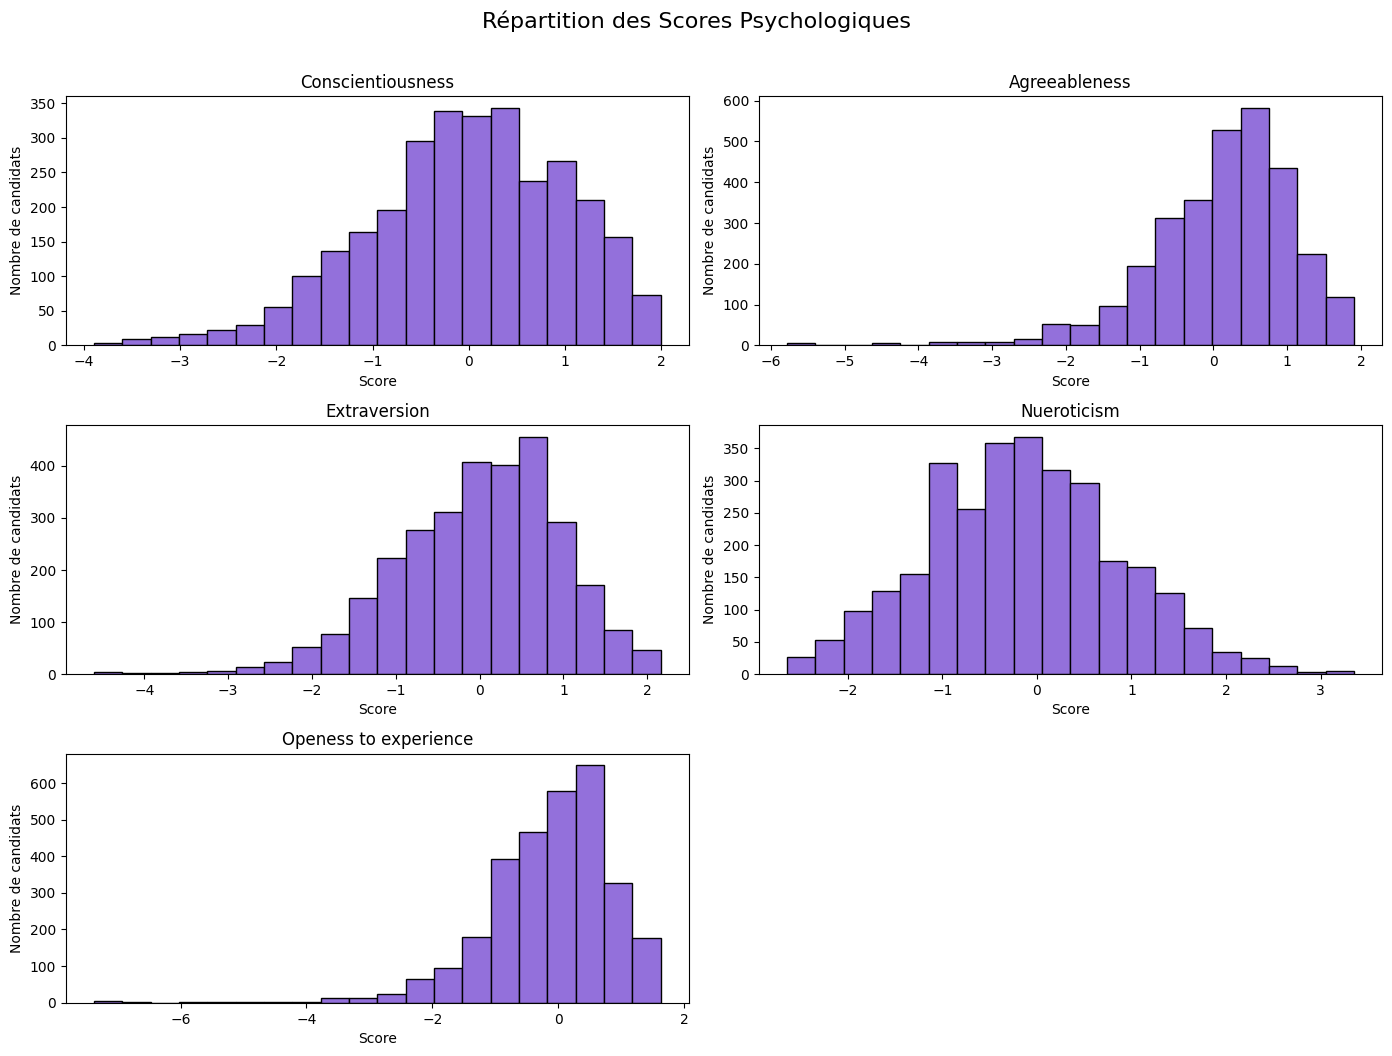

In [49]:
# Liste des colonnes de scores psychologiques avec les noms corrigés
psychological_scores_corrected = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Tracer la répartition des scores psychologiques avec les noms corrigés
plt.figure(figsize=(14, 10))
for i, col in enumerate(psychological_scores_corrected, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[col].dropna(), bins=20, color='mediumpurple', edgecolor='black')
    plt.title(col.capitalize().replace("_", " "))
    plt.xlabel("Score")
    plt.ylabel("Nombre de candidats")
    plt.tight_layout(pad=1.0)

plt.suptitle("Répartition des Scores Psychologiques", y=1.05, fontsize=16)
plt.show()


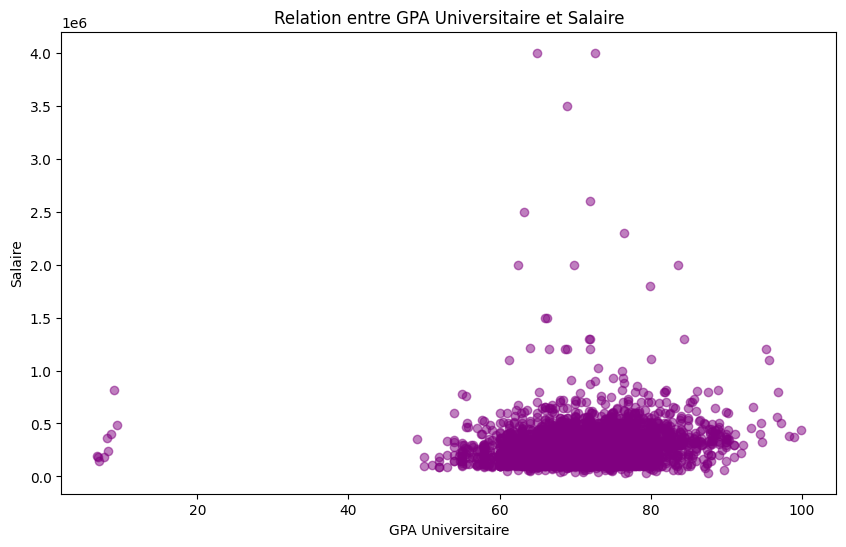

In [53]:
# Commencons à présent à mettre en relation différentes variables :

# Nuage de points pour la relation entre GPA universitaire et salaire
plt.figure(figsize=(10, 6))
plt.scatter(df['collegeGPA'], df['Salary'], alpha=0.5, color='purple')
plt.title("Relation entre GPA Universitaire et Salaire")
plt.xlabel("GPA Universitaire")
plt.ylabel("Salaire")
plt.show()


# 4. Préparation pour la modélisation
• Diviser les données en ensembles d'entraînement et de test <br>
• Normaliser/standardiser les features ( caractéristiques) si nécessaire

In [1]:
print("hello")

hello


# 5. Régression linéaire
• Implémenter une régression linéaire multiple pour prédire une variable continue <br>
• Évaluer le modèle (R², RMSE) et interpréter les coefficients

# 6. Classification et Machine Learning
• Comparer ces algorithmes et choisir le plus adapté pour votre étude : <br>
    •  Régression logistique<br>
    • Arbre de décision<br>
    • Random Forest<br>
• SVM<br>
• Évaluer les performances (précision, rappel, F1-score, courbe ROC)<br>
• Optimiser les hyperparamètres avec GridSearchCV ou RandomizedSearchCV

# 8. Prédiction et Déploiement du Modèle
• Sélectionner le meilleur modèle basé sur les performances<br>
• Entraîner le modèle final sur l'ensemble des données<br>
• Créer une fonction de prédiction qui prend en entrée des caractéristiques
(features) et permet de prédire des résultats (à vous de préciser quel type de 
résultat prédire)<br>
• Développer une interface simple pour utiliser le modèle (par exemple, avec 
Streamlit ou Flask)


# 9. Interprétation et conclusions
• Résumer les principaux insights de l'analyse<br>
• Identifier les facteurs les plus importants pour la prédiction selon le domaine 
choisi<br>
• Proposer des recommandations basées sur les résultats